# NeuroPredict
## EEG Seizure Classification

### Exploratory Data Analysis

In this notebook, we will explore the **Epileptic Seizure Recognition** dataset to understand the characteristics of EEG signals associated with different medical states. This analysis will serve as a foundation for feature engineering and model development in subsequent stages of the project.

In [14]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load the Dataset

In [15]:
# Load the dataset
data_path = '/home/aheggs/code/y01a-BG/NeuroPredict/data.csv'
df = pd.read_csv(data_path)

In [16]:
# Display the first few rows
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,-278,-246,-215,-191,-177,-167,-157,-139,-118,-92,...,-400,-379,-336,-281,-226,-174,-125,-79,-40,1
1,-167,-230,-280,-315,-338,-369,-405,-392,-298,-140,...,423,434,416,374,319,268,215,165,103,1
2,-24,-15,-5,-1,4,3,6,10,11,7,...,32,35,36,34,32,26,23,18,20,2
3,-135,-133,-125,-118,-111,-105,-102,-93,-94,-90,...,-49,-39,-35,-29,-10,4,21,31,37,3
4,39,41,41,42,43,43,46,47,49,50,...,43,41,41,43,43,40,41,41,49,2


## Data Overview

In [17]:
# Check the shape of the dataset
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

Dataset contains 6894 rows and 179 columns.


In [18]:
# Check for missing values
df.isnull().sum()

X1      0
X2      0
X3      0
X4      0
X5      0
       ..
X175    0
X176    0
X177    0
X178    0
y       0
Length: 179, dtype: int64

### Class Distribution

In [19]:
# Understand the distribution of classes
class_counts = df['y'].value_counts()
print(class_counts)

y
1    2298
2    2298
3    2298
Name: count, dtype: int64


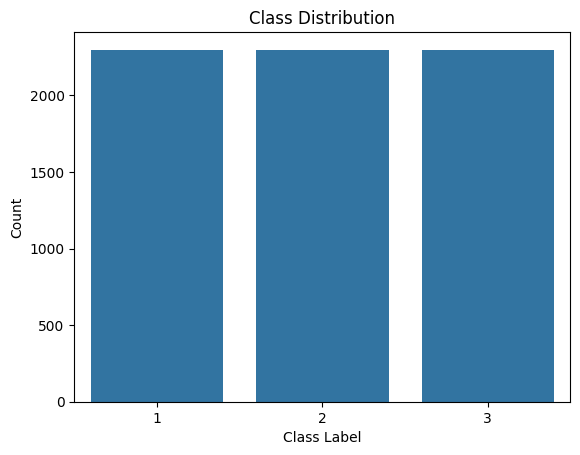

In [20]:
# Plot the class distribution
sns.countplot(x='y', data=df)
plt.title('Class Distribution')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.show()

### Data Description

In [21]:
# Get basic statistics
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,...,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.00000,6894.000000,6894.000000
mean,-13.016246,-12.222512,-11.153612,-9.562663,-7.610966,-5.748332,-4.569771,-4.668988,-4.380766,-3.654627,...,-10.533652,-12.729330,-14.783000,-15.945605,-15.419060,-14.976936,-14.494198,-14.09385,-13.743980,2.000000
std,208.206936,208.650092,205.193264,202.156777,201.848048,202.304529,202.511809,203.392075,203.329704,201.254439,...,206.895233,208.838012,212.046259,212.080414,210.388171,206.375914,204.502238,204.44473,207.058656,0.816556
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.000000,-1840.000000,-1867.000000,...,-1867.000000,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.00000,-1829.000000,1.000000
25%,-64.000000,-63.000000,-63.000000,-63.000000,-62.000000,-62.000000,-61.000000,-62.000000,-62.000000,-61.000000,...,-63.000000,-64.000000,-65.000000,-65.000000,-65.000000,-64.000000,-64.000000,-63.00000,-63.000000,1.000000
50%,-8.000000,-7.000000,-8.000000,-7.000000,-8.000000,-8.000000,-7.000000,-8.000000,-7.000000,-7.000000,...,-10.000000,-10.000000,-11.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.00000,-9.000000,2.000000
75%,40.000000,41.000000,42.000000,43.000000,43.000000,43.000000,43.000000,45.000000,45.750000,45.750000,...,39.000000,39.000000,39.000000,40.000000,41.000000,39.000000,40.000000,39.00000,39.000000,3.000000
max,1726.000000,1713.000000,1697.000000,1612.000000,1518.000000,1816.000000,2047.000000,2047.000000,2047.000000,2047.000000,...,1777.000000,1472.000000,1319.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.00000,1915.000000,3.000000


## Visualizing EEG Signals

Let's visualize some of the EEG signals from different classes to observe any noticeable patterns.

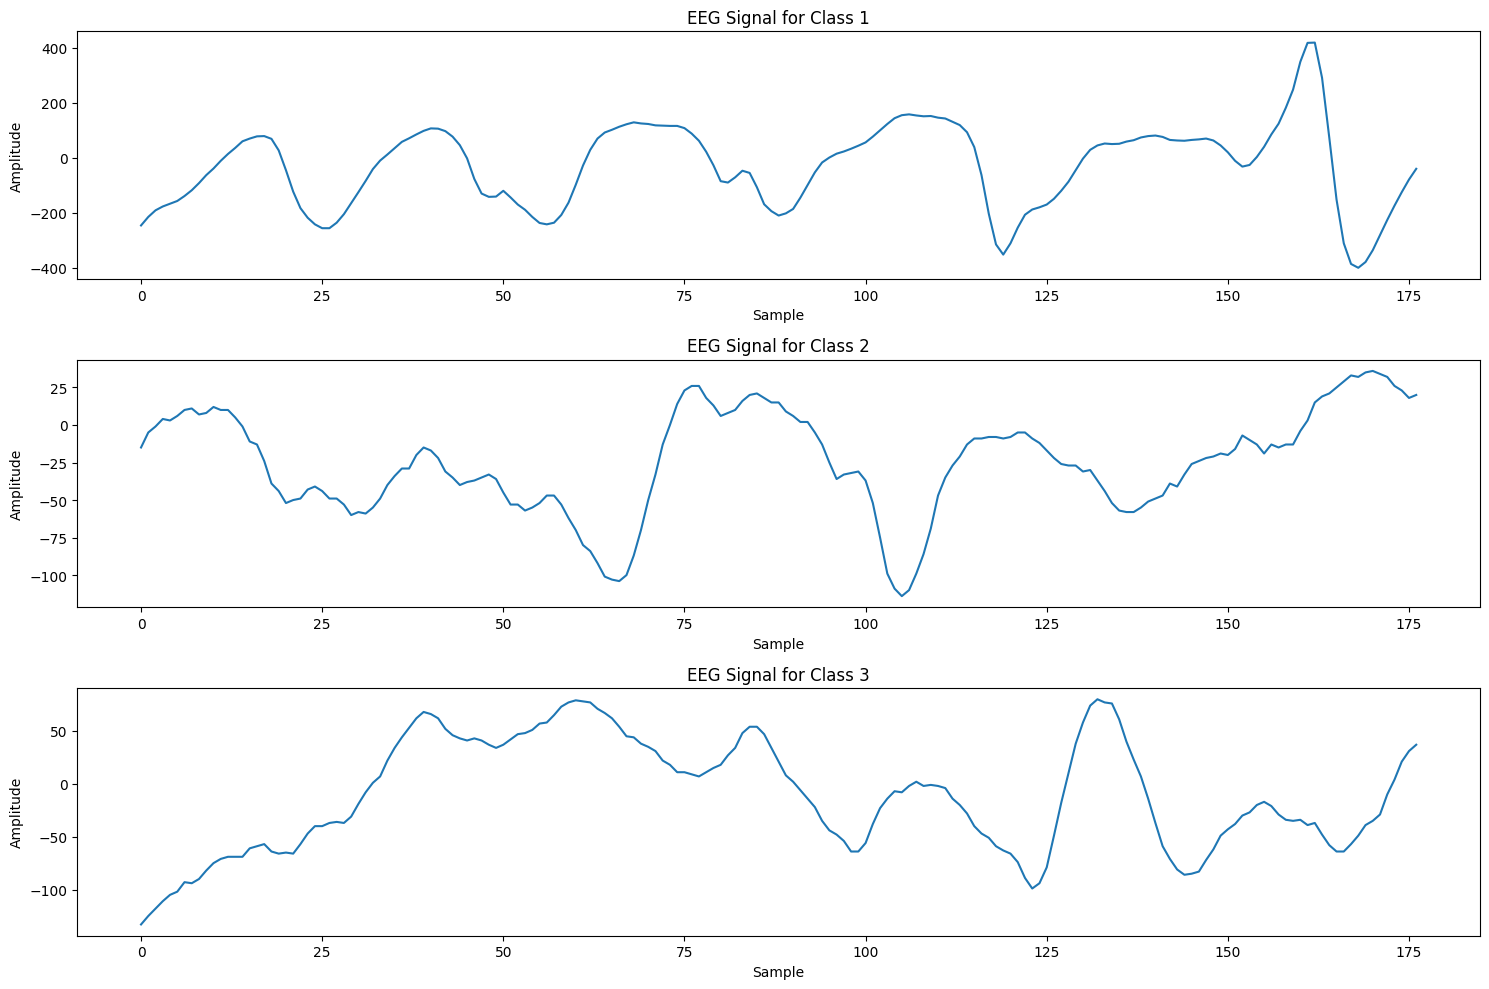

In [22]:
# Select a sample from each class
samples = {}
for label in df['y'].unique():
    samples[label] = df[df['y'] == label].iloc[0, 1:-1]

# Plot the EEG signals
fig, axs = plt.subplots(len(samples), 1, figsize=(15, 10))
for i, label in enumerate(samples):
    axs[i].plot(samples[label].values)
    axs[i].set_title(f'EEG Signal for Class {label}')
    axs[i].set_xlabel('Sample')
    axs[i].set_ylabel('Amplitude')
plt.tight_layout()
plt.show()

## Feature Correlation

Due to the high dimensionality of the data, computing correlations for all features may not be practical. Therefore, we can compute the correlation between a subset of features and the target variable.

In [23]:
# Select a subset of features
subset_features = df.columns[1:21]  # First 20 features

# Compute correlations
correlations = df[subset_features].corrwith(df['y'])
correlations = correlations.abs().sort_values(ascending=False)
print(correlations)

X11    0.049632
X10    0.046422
X12    0.045321
X9     0.040842
X8     0.038607
X7     0.037217
X13    0.033660
X6     0.028354
X14    0.024940
X15    0.019582
X2     0.019435
X16    0.018046
X17    0.017185
X21    0.016614
X20    0.015767
X19    0.015688
X18    0.015525
X5     0.014660
X3     0.010946
X4     0.001216
dtype: float64


### Heatmap of Feature Correlation

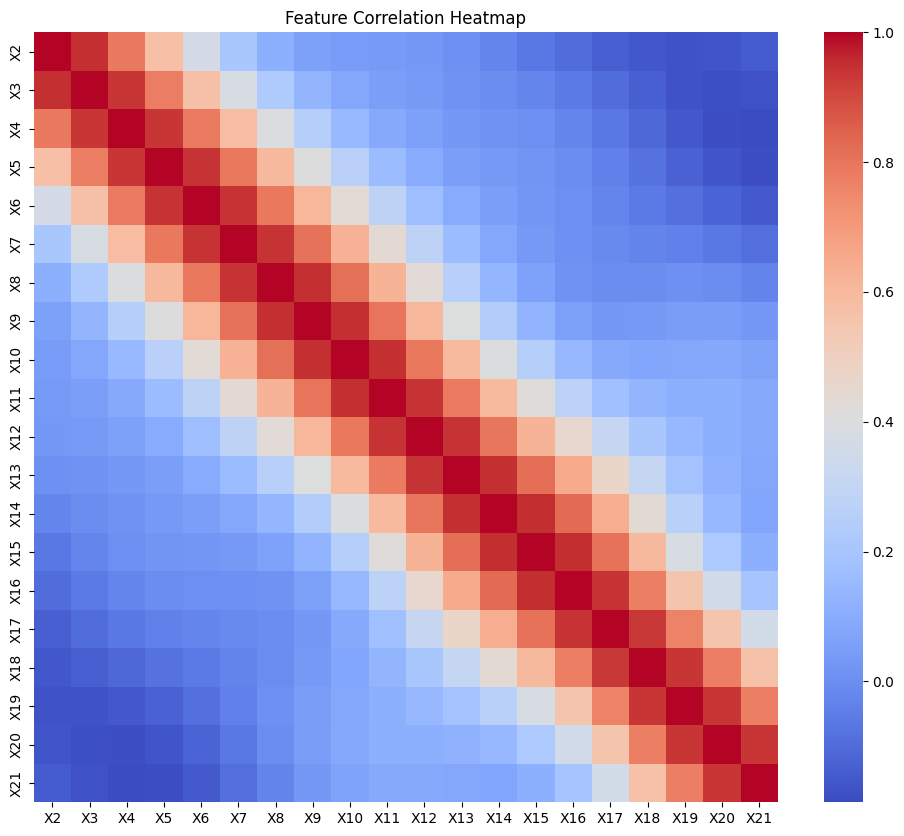

In [24]:
# Compute correlation matrix for the subset
corr_matrix = df[subset_features].corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

## Time Series Analysis

Performing time series analysis on EEG signals can help uncover temporal patterns.

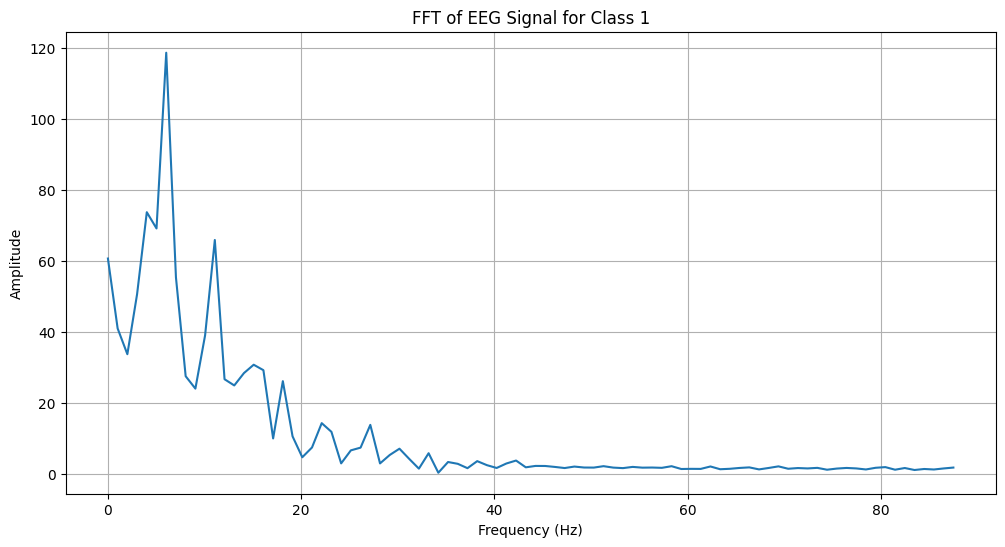

In [25]:
# Plot FFT of a sample signal
from scipy.fft import fft, fftfreq

# Sample signal from class 1
signal = df[df['y'] == 1].iloc[0, 1:-1].values

# Number of sample points
N = len(signal)
# Sample spacing
T = 1.0 / 178.0  # Assuming sampling rate is 178 Hz

yf = fft(signal)
xf = fftfreq(N, T)[:N//2]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.title('FFT of EEG Signal for Class 1')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

## Initial Observations

- The dataset is balanced across classes.
- EEG signals show distinct patterns for different classes.
- There is some correlation between features that can be exploited.
- Time series analysis like FFT can help in feature extraction.

## Next Steps

- Perform comprehensive feature engineering using time and frequency domain features.
- Explore dimensionality reduction techniques to address the high dimensionality.
- Prepare data for modeling by scaling and splitting into training and test sets.

## Comprehensive Feature Engineering (Time and Frequency Domains)
To capture the most useful information from the EEG signals, we will compute:

- Statistical features (time domain): mean, standard deviation, skewness, kurtosis.
- Frequency domain features: dominant frequency, power spectral density (PSD), and frequency bands features.

#### Adding Time-Domain Statistical Features

In [30]:
from scipy.stats import skew, kurtosis

# Define features (X) and labels (y) explicitly
X = df.iloc[:, 1:-1].values  # EEG data starts from the second column and excludes the target column
y = df['y'].values

# Compute statistical features for each sample
def compute_time_domain_features(X):
    features = pd.DataFrame()
    features['mean'] = X.mean(axis=1)
    features['std'] = X.std(axis=1)
    features['skewness'] = skew(X, axis=1)
    features['kurtosis'] = kurtosis(X, axis=1)
    return features

time_features = compute_time_domain_features(X)
time_features.head()

,mean,std,skewness,kurtosis
0,-30.293785,151.090550,-0.084656,-0.034913
1,44.666667,297.803155,0.492058,-0.556609
2,-24.954802,34.040159,-0.417917,-0.207622
3,-11.683616,52.614808,-0.016511,-1.027900
4,30.711864,26.377347,-0.247244,-0.598788


#### Adding Frequency-Domain (FFT) Features

In [31]:
from scipy.signal import welch

def compute_frequency_features(X, fs=178):
    dominant_freq = []
    psd_band_power = []
    for sample in X:
        freqs, psd = welch(sample, fs=fs, nperseg=128)
        # Dominant frequency
        dom_freq = freqs[np.argmax(psd)]
        dominant_freq.append(dom_freq)

        # PSD band power (e.g., α: 8–13 Hz)
        alpha_band = np.logical_and(freqs >= 8, freqs <= 13)
        alpha_power = np.sum(psd[alpha_band])
        psd_band_power.append(alpha_power)

    freq_features_df = pd.DataFrame({
        'dominant_freq': dominant_freq,
        'alpha_band_power': psd_band_power
    })
    return freq_features_df

freq_features = compute_frequency_features(X)
freq_features.head()

,dominant_freq,alpha_band_power
0,5.562500,419.065679
1,4.171875,11242.801187
2,4.171875,146.877177
3,1.390625,107.804939
4,1.390625,46.298241


#### Combine Features into Final Features DataFrame

In [32]:
# Combine original statistical and frequency-domain features
features_df = pd.concat([time_features, freq_features], axis=1)
features_df['y'] = y
features_df.head()

,mean,std,skewness,kurtosis,dominant_freq,alpha_band_power,y
0,-30.293785,151.090550,-0.084656,-0.034913,5.562500,419.065679,1
1,44.666667,297.803155,0.492058,-0.556609,4.171875,11242.801187,1
2,-24.954802,34.040159,-0.417917,-0.207622,4.171875,146.877177,2
3,-11.683616,52.614808,-0.016511,-1.027900,1.390625,107.804939,3
4,30.711864,26.377347,-0.247244,-0.598788,1.390625,46.298241,2


### Dimensionality Reduction Exploration (PCA and Visualization)
To further investigate the data and potentially reduce feature dimensionality, we apply Principal Component Analysis (PCA).

#### Scaling Features before Dimensionality Reduction

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features_df.drop('y', axis=1))

#### Apply PCA and Plot Explained Variance

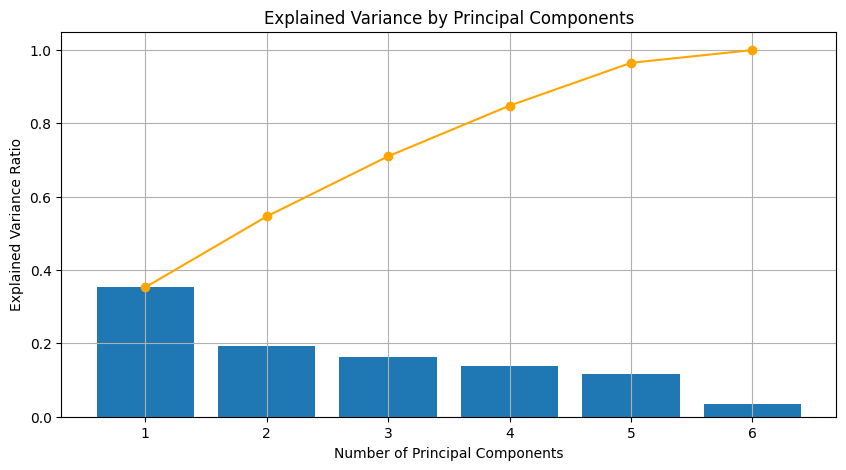

In [36]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_scaled)

variance_ratio = pca.explained_variance_ratio_

# Plot explained variance
plt.figure(figsize=(10,5))
plt.bar(range(1, len(variance_ratio)+1), variance_ratio)
plt.plot(range(1, len(variance_ratio)+1), np.cumsum(variance_ratio), marker='o', color='orange')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.grid()
plt.show()

#### Visualizing PCA Components to Compare Classes
Visualize the first two PCA components. A good separation would indicate that PCA can be useful for reducing the dimensionality.

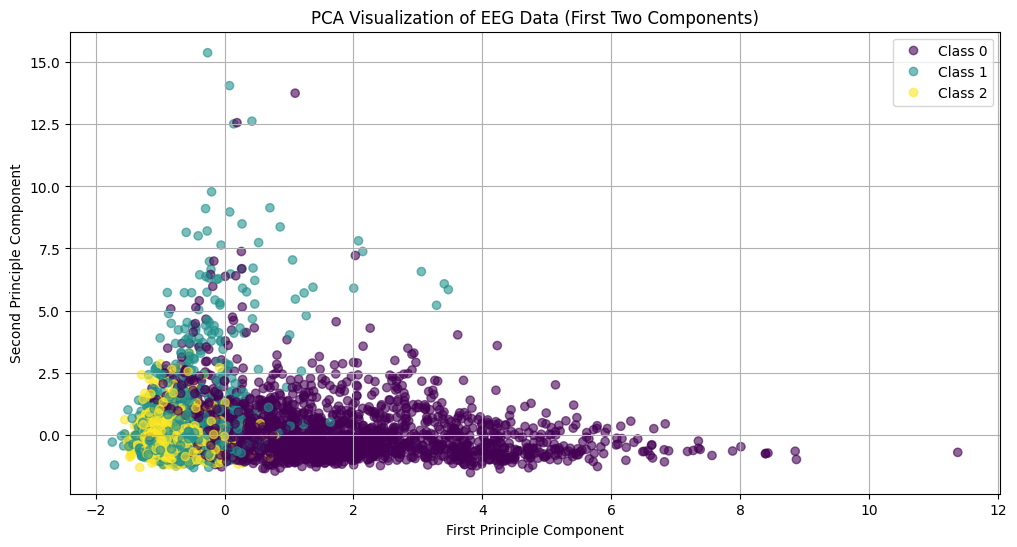

In [37]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=features_df.y, cmap='viridis', alpha=0.6)
plt.title('PCA Visualization of EEG Data (First Two Components)')
plt.xlabel('First Principle Component')
plt.ylabel('Second Principle Component')
plt.legend(handles=scatter.legend_elements()[0], labels=['Class 0', 'Class 1', 'Class 2'])
plt.grid()
plt.show()

## Updated Observations
- Time-domain and frequency-domain features effectively summarize signal characteristics.
- Dominant frequencies and alpha-band power are potentially differentiating measures between EEG signal classes.
- PCA indicated that a good amount of variance is explained by fewer components, suggesting component-based feature extraction or reduction could be beneficial.

## Updated Next Steps
- Further refine feature processing and evaluate different dimensionality reduction methods (e.g., PCA, t-SNE, UMAP).
- Split data into train/test sets and prepare modeling pipelines with preprocessed features.
- Train and evaluate ML classifiers for EEG classification.